# Evolution of Temperature for the city of Rome 2019-2024

### Website: [Regione Lazio](https://www.regione.lazio.it/)
### Data source: [Link](https://www.siarl-lazio.it/E9.asp)

In [185]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://media.hswstatic.com/eyJidWNrZXQiOiJjb250ZW50Lmhzd3N0YXRpYy5jb20iLCJrZXkiOiJnaWZcL3JlZGVmaW5lZm91cnNlYXNvbnMtMS5qcGciLCJlZGl0cyI6eyJyZXNpemUiOnsid2lkdGgiOjgyOH0sInRvRm9ybWF0IjoiYXZpZiJ9fQ==")

Image credits: KATHY COLLINS / GETTY IMAGES

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
import datetime as dt
import glob as glob
warnings.simplefilter(action="ignore",category=FutureWarning)
pd.options.mode.chained_assignment = None

In [78]:
# Importing Data

all_files=glob.glob("opdata*.csv")
file_list=[]
for file in all_files:
    data=pd.read_csv(file,delimiter=";",encoding="latin1")
    file_list.append(data)
df=pd.concat(file_list)

### 1. Exploring Data

In [79]:
df.head()

,Stazione,Grandezza,Data rilevazione,Valore,Indice di validità
0,ACCUMOLI,TEMPARIA2M_MING,01/01/2021 00:00,"-1,5",Dato esatto
1,ACCUMOLI,TEMPARIA2M_MING,02/01/2021 00:00,"-0,7",Dato esatto
2,ACCUMOLI,TEMPARIA2M_MING,03/01/2021 00:00,-1,Dato esatto
3,ACCUMOLI,TEMPARIA2M_MING,04/01/2021 00:00,"-1,2",Dato esatto
4,ACCUMOLI,TEMPARIA2M_MING,05/01/2021 00:00,"-2,5",Dato esatto


In [48]:
df.shape
f"{df.shape[0]} Rows by {df.shape[1]} Columns"

'530526 Rows by 5 Columns'

In [49]:
df.describe()

,Stazione,Grandezza,Data rilevazione,Valore,Indice di validità
count,530526,530526,530526,530526,530526
unique,96,5,1126,5837,1
top,FARA SABINA S. Andrea,PREC_TOTG,29/04/2023 00:00,0,Dato esatto
freq,5630,106164,480,67214,530526


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530526 entries, 0 to 14702
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Stazione            530526 non-null  object
 1   Grandezza           530526 non-null  object
 2   Data rilevazione    530526 non-null  object
 3   Valore              530526 non-null  object
 4   Indice di validità  530526 non-null  object
dtypes: object(5)
memory usage: 24.3+ MB


### 2. Cleaning up the Data!

In [80]:
df

,Stazione,Grandezza,Data rilevazione,Valore,Indice di validità
0,ACCUMOLI,TEMPARIA2M_MING,01/01/2021 00:00,"-1,5",Dato esatto
1,ACCUMOLI,TEMPARIA2M_MING,02/01/2021 00:00,"-0,7",Dato esatto
2,ACCUMOLI,TEMPARIA2M_MING,03/01/2021 00:00,-1,Dato esatto
3,ACCUMOLI,TEMPARIA2M_MING,04/01/2021 00:00,"-1,2",Dato esatto
4,ACCUMOLI,TEMPARIA2M_MING,05/01/2021 00:00,"-2,5",Dato esatto
...,...,...,...,...,...
14698,TARQUINIA Poggio Nebbia,UMARIA2M_MEDG,27/01/2024 00:00,"75,33",Dato esatto
14699,TARQUINIA Poggio Nebbia,UMARIA2M_MEDG,28/01/2024 00:00,"64,58",Dato esatto
14700,TARQUINIA Poggio Nebbia,UMARIA2M_MEDG,29/01/2024 00:00,"60,71",Dato esatto
14701,TARQUINIA Poggio Nebbia,UMARIA2M_MEDG,30/01/2024 00:00,"66,38",Dato esatto


In [81]:
# Filtering by Station

filter=(df["Stazione"]=="FIUMICINO T. Lepre")
df=df[filter]
df

,Stazione,Grandezza,Data rilevazione,Valore,Indice di validità
45236,FIUMICINO T. Lepre,TEMPARIA2M_MING,01/01/2021 00:00,"3,7",Dato esatto
45237,FIUMICINO T. Lepre,TEMPARIA2M_MING,02/01/2021 00:00,"6,2",Dato esatto
45238,FIUMICINO T. Lepre,TEMPARIA2M_MING,03/01/2021 00:00,5,Dato esatto
45239,FIUMICINO T. Lepre,TEMPARIA2M_MING,04/01/2021 00:00,"3,9",Dato esatto
45240,FIUMICINO T. Lepre,TEMPARIA2M_MING,09/01/2021 00:00,"4,2",Dato esatto
...,...,...,...,...,...
4023,FIUMICINO T. Lepre,UMARIA2M_MEDG,27/01/2024 00:00,"78,79",Dato esatto
4024,FIUMICINO T. Lepre,UMARIA2M_MEDG,28/01/2024 00:00,"73,46",Dato esatto
4025,FIUMICINO T. Lepre,UMARIA2M_MEDG,29/01/2024 00:00,"65,79",Dato esatto
4026,FIUMICINO T. Lepre,UMARIA2M_MEDG,30/01/2024 00:00,"71,92",Dato esatto


In [82]:
filter=(df["Grandezza"]=="TEMPARIA2M_MING")|(df["Grandezza"]=="TEMPARIA2M_MAXG")
df=df[filter]
df

,Stazione,Grandezza,Data rilevazione,Valore,Indice di validità
45236,FIUMICINO T. Lepre,TEMPARIA2M_MING,01/01/2021 00:00,"3,7",Dato esatto
45237,FIUMICINO T. Lepre,TEMPARIA2M_MING,02/01/2021 00:00,"6,2",Dato esatto
45238,FIUMICINO T. Lepre,TEMPARIA2M_MING,03/01/2021 00:00,5,Dato esatto
45239,FIUMICINO T. Lepre,TEMPARIA2M_MING,04/01/2021 00:00,"3,9",Dato esatto
45240,FIUMICINO T. Lepre,TEMPARIA2M_MING,09/01/2021 00:00,"4,2",Dato esatto
...,...,...,...,...,...
3930,FIUMICINO T. Lepre,TEMPARIA2M_MAXG,27/01/2024 00:00,"17,4",Dato esatto
3931,FIUMICINO T. Lepre,TEMPARIA2M_MAXG,28/01/2024 00:00,"18,1",Dato esatto
3932,FIUMICINO T. Lepre,TEMPARIA2M_MAXG,29/01/2024 00:00,"15,2",Dato esatto
3933,FIUMICINO T. Lepre,TEMPARIA2M_MAXG,30/01/2024 00:00,"14,9",Dato esatto


In [83]:
df["Valore"]=df["Valore"].str.replace(",",".")

In [84]:
import locale
locale.setlocale(locale.LC_ALL,'en_US.UTF-8')

'en_US.UTF-8'

In [85]:
df["Valore"]=df["Valore"].apply(locale.atof)

In [86]:
df["Data rilevazione"]=pd.to_datetime(df["Data rilevazione"], format="%d/%m/%Y %H:%M")
df

,Stazione,Grandezza,Data rilevazione,Valore,Indice di validità
45236,FIUMICINO T. Lepre,TEMPARIA2M_MING,2021-01-01,3.7,Dato esatto
45237,FIUMICINO T. Lepre,TEMPARIA2M_MING,2021-01-02,6.2,Dato esatto
45238,FIUMICINO T. Lepre,TEMPARIA2M_MING,2021-01-03,5.0,Dato esatto
45239,FIUMICINO T. Lepre,TEMPARIA2M_MING,2021-01-04,3.9,Dato esatto
45240,FIUMICINO T. Lepre,TEMPARIA2M_MING,2021-01-09,4.2,Dato esatto
...,...,...,...,...,...
3930,FIUMICINO T. Lepre,TEMPARIA2M_MAXG,2024-01-27,17.4,Dato esatto
3931,FIUMICINO T. Lepre,TEMPARIA2M_MAXG,2024-01-28,18.1,Dato esatto
3932,FIUMICINO T. Lepre,TEMPARIA2M_MAXG,2024-01-29,15.2,Dato esatto
3933,FIUMICINO T. Lepre,TEMPARIA2M_MAXG,2024-01-30,14.9,Dato esatto


In [87]:
df.insert(3,"year-month","")
df["year-month"]=df["Data rilevazione"].dt.strftime('%Y-%m')
df

,Stazione,Grandezza,Data rilevazione,year-month,Valore,Indice di validità
45236,FIUMICINO T. Lepre,TEMPARIA2M_MING,2021-01-01,2021-01,3.7,Dato esatto
45237,FIUMICINO T. Lepre,TEMPARIA2M_MING,2021-01-02,2021-01,6.2,Dato esatto
45238,FIUMICINO T. Lepre,TEMPARIA2M_MING,2021-01-03,2021-01,5.0,Dato esatto
45239,FIUMICINO T. Lepre,TEMPARIA2M_MING,2021-01-04,2021-01,3.9,Dato esatto
45240,FIUMICINO T. Lepre,TEMPARIA2M_MING,2021-01-09,2021-01,4.2,Dato esatto
...,...,...,...,...,...,...
3930,FIUMICINO T. Lepre,TEMPARIA2M_MAXG,2024-01-27,2024-01,17.4,Dato esatto
3931,FIUMICINO T. Lepre,TEMPARIA2M_MAXG,2024-01-28,2024-01,18.1,Dato esatto
3932,FIUMICINO T. Lepre,TEMPARIA2M_MAXG,2024-01-29,2024-01,15.2,Dato esatto
3933,FIUMICINO T. Lepre,TEMPARIA2M_MAXG,2024-01-30,2024-01,14.9,Dato esatto


In [88]:
df_roma=df.groupby(["year-month"],as_index=False)["Valore"].agg(["min","max"])
df_roma

,year-month,min,max
0,2021-01,-1.4,17.0
1,2021-02,-2.1,20.5
2,2021-03,0.2,23.6
3,2021-04,-0.6,25.2
4,2021-05,7.8,29.3
5,2021-06,12.5,36.1
6,2021-07,16.0,36.6
7,2021-08,15.1,39.9
8,2021-09,15.0,33.2
9,2021-10,9.2,29.7


### 3. Analyse Data

In [89]:
roma=df_roma.copy()

In [90]:
roma

,year-month,min,max
0,2021-01,-1.4,17.0
1,2021-02,-2.1,20.5
2,2021-03,0.2,23.6
3,2021-04,-0.6,25.2
4,2021-05,7.8,29.3
5,2021-06,12.5,36.1
6,2021-07,16.0,36.6
7,2021-08,15.1,39.9
8,2021-09,15.0,33.2
9,2021-10,9.2,29.7


<Axes: >

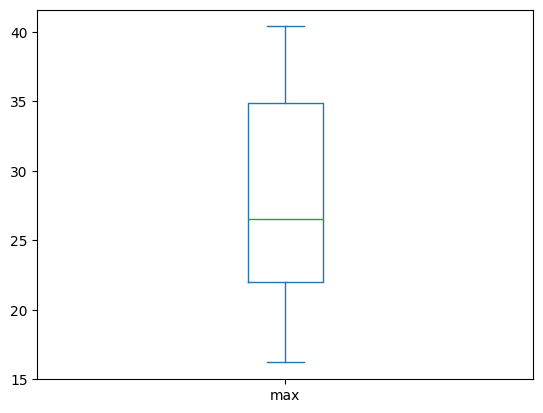

In [91]:
roma["max"].plot(kind="box")

No outliers found

<Axes: >

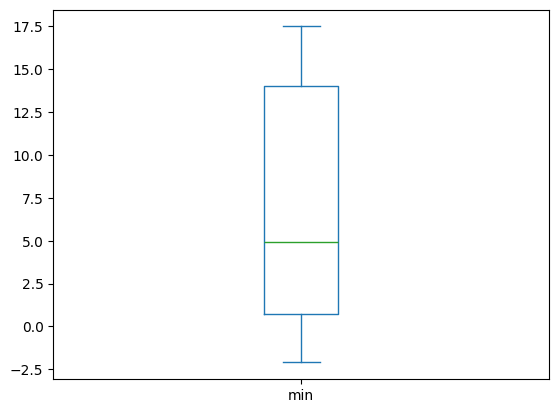

In [92]:
roma["min"].plot(kind="box")

No outliers found

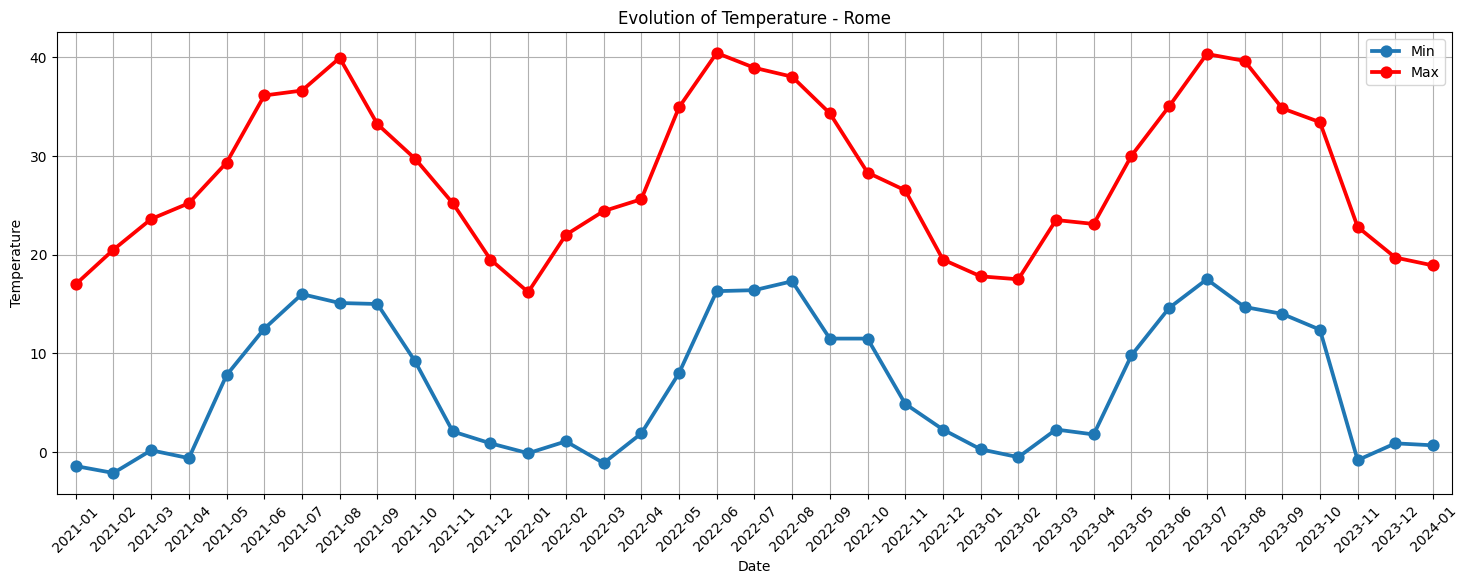

In [93]:
plt.figure(figsize=(18,6))
sns.pointplot(data=roma, x="year-month", y="min",label="Min")
sns.pointplot(data=roma, x="year-month", y="max",label="Max",color="r")
plt.xticks(rotation=45)
plt.ylabel("Temperature")
plt.xlabel("Date")
plt.title("Evolution of Temperature - Rome")
plt.grid()
plt.show()

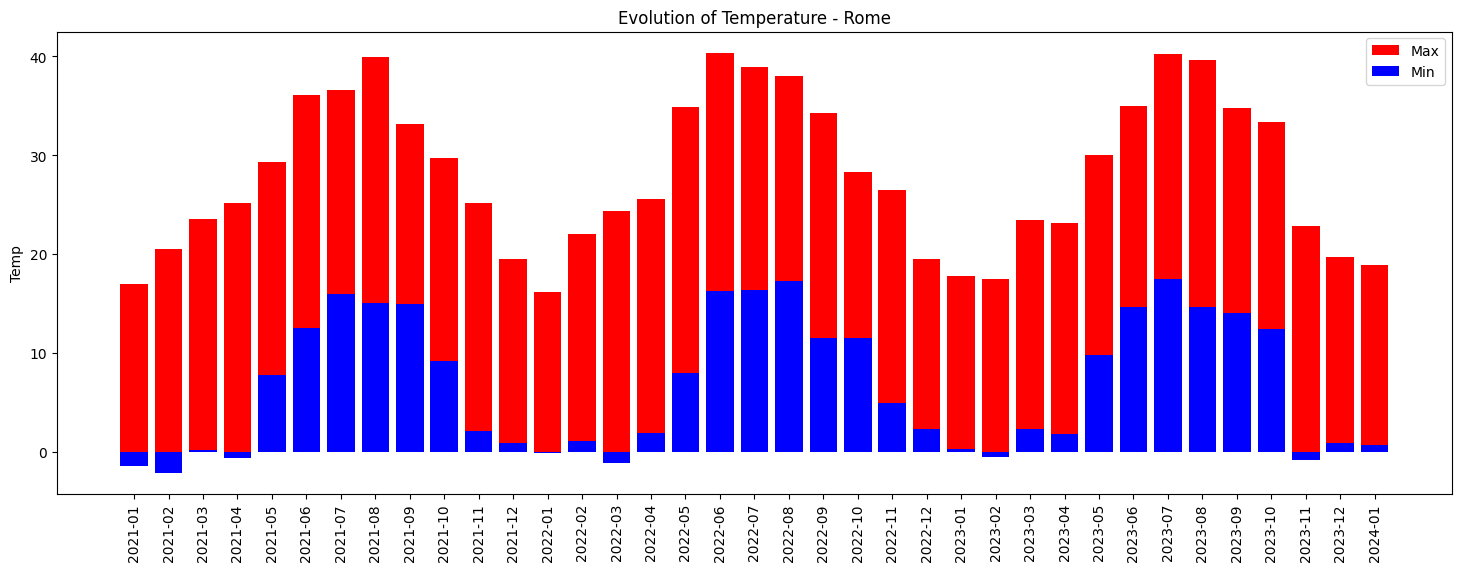

In [94]:
plt.figure(figsize=(18,6))
plt.bar(roma["year-month"],roma["max"],color="Red")
plt.bar(roma["year-month"],roma["min"],color="Blue")
plt.xticks(rotation = 90)
plt.title('Evolution of Temperature - Rome')
plt.ylabel('Temp')
plt.legend(['Max', 'Min'])
plt.show()

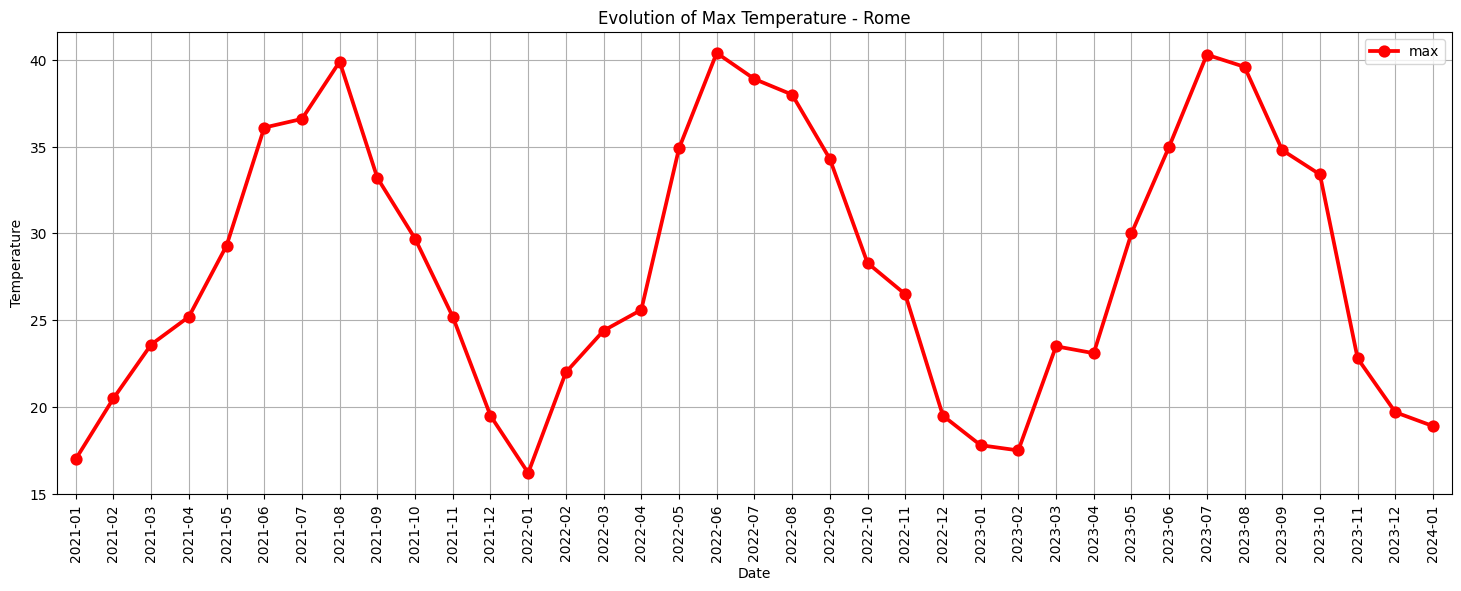

In [96]:
plt.figure(figsize=(18,6))
sns.pointplot(data=roma, x="year-month", y="max",label="max",color="r")
plt.xticks(rotation=90)
plt.ylabel("Temperature")
plt.xlabel("Date")
plt.title("Evolution of Max Temperature - Rome")
plt.grid()
plt.show()

In [98]:
fig = px.scatter(roma, x="year-month", y="max", size="max", hover_name="max", title='Rome Temperature 2023', size_max=60, color='max')
fig.update_xaxes(title_text='')
fig.update_yaxes(title_text='Temperature')
fig.show()

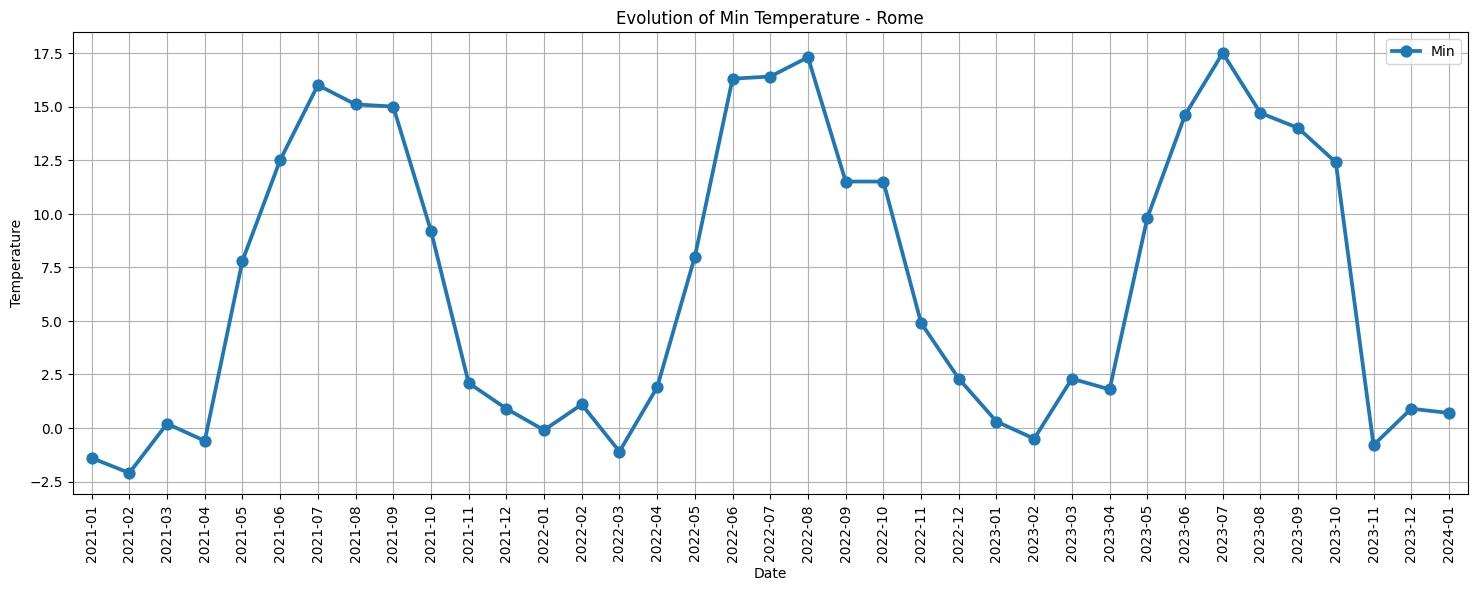

In [100]:
plt.figure(figsize=(18,6))
sns.pointplot(data=roma, x="year-month", y="min",label="Min")
plt.xticks(rotation=90)
plt.ylabel("Temperature")
plt.xlabel("Date")
plt.title("Evolution of Min Temperature - Rome")
plt.grid()
plt.show()

In [167]:
#roma.to_csv("Roma",index=False)

## What happened in 2023?

In [106]:
df

,Stazione,Grandezza,Data rilevazione,year-month,Valore,Indice di validità
45236,FIUMICINO T. Lepre,TEMPARIA2M_MING,2021-01-01,2021-01,3.7,Dato esatto
45237,FIUMICINO T. Lepre,TEMPARIA2M_MING,2021-01-02,2021-01,6.2,Dato esatto
45238,FIUMICINO T. Lepre,TEMPARIA2M_MING,2021-01-03,2021-01,5.0,Dato esatto
45239,FIUMICINO T. Lepre,TEMPARIA2M_MING,2021-01-04,2021-01,3.9,Dato esatto
45240,FIUMICINO T. Lepre,TEMPARIA2M_MING,2021-01-09,2021-01,4.2,Dato esatto
...,...,...,...,...,...,...
3930,FIUMICINO T. Lepre,TEMPARIA2M_MAXG,2024-01-27,2024-01,17.4,Dato esatto
3931,FIUMICINO T. Lepre,TEMPARIA2M_MAXG,2024-01-28,2024-01,18.1,Dato esatto
3932,FIUMICINO T. Lepre,TEMPARIA2M_MAXG,2024-01-29,2024-01,15.2,Dato esatto
3933,FIUMICINO T. Lepre,TEMPARIA2M_MAXG,2024-01-30,2024-01,14.9,Dato esatto


In [107]:
filter=df["Data rilevazione"].dt.year.isin([2023])
roma_2023=df[filter]
roma_2023

,Stazione,Grandezza,Data rilevazione,year-month,Valore,Indice di validità
45557,FIUMICINO T. Lepre,TEMPARIA2M_MING,2023-01-01,2023-01,7.8,Dato esatto
45558,FIUMICINO T. Lepre,TEMPARIA2M_MING,2023-01-02,2023-01,9.5,Dato esatto
45559,FIUMICINO T. Lepre,TEMPARIA2M_MING,2023-01-03,2023-01,10.1,Dato esatto
45560,FIUMICINO T. Lepre,TEMPARIA2M_MING,2023-01-04,2023-01,7.7,Dato esatto
45561,FIUMICINO T. Lepre,TEMPARIA2M_MING,2023-01-05,2023-01,5.1,Dato esatto
...,...,...,...,...,...,...
46282,FIUMICINO T. Lepre,TEMPARIA2M_MAXG,2023-12-27,2023-12,16.1,Dato esatto
46283,FIUMICINO T. Lepre,TEMPARIA2M_MAXG,2023-12-28,2023-12,11.8,Dato esatto
46284,FIUMICINO T. Lepre,TEMPARIA2M_MAXG,2023-12-29,2023-12,15.1,Dato esatto
46285,FIUMICINO T. Lepre,TEMPARIA2M_MAXG,2023-12-30,2023-12,17.4,Dato esatto


In [108]:
roma_2023.insert(4,"month","")
roma_2023.insert(5,"month name","")

In [109]:
roma_2023["month"]=roma_2023["Data rilevazione"].dt.month
roma_2023["month name"]=roma_2023["Data rilevazione"].dt.month_name()
roma_2023

,Stazione,Grandezza,Data rilevazione,year-month,month,month name,Valore,Indice di validità
45557,FIUMICINO T. Lepre,TEMPARIA2M_MING,2023-01-01,2023-01,1,January,7.8,Dato esatto
45558,FIUMICINO T. Lepre,TEMPARIA2M_MING,2023-01-02,2023-01,1,January,9.5,Dato esatto
45559,FIUMICINO T. Lepre,TEMPARIA2M_MING,2023-01-03,2023-01,1,January,10.1,Dato esatto
45560,FIUMICINO T. Lepre,TEMPARIA2M_MING,2023-01-04,2023-01,1,January,7.7,Dato esatto
45561,FIUMICINO T. Lepre,TEMPARIA2M_MING,2023-01-05,2023-01,1,January,5.1,Dato esatto
...,...,...,...,...,...,...,...,...
46282,FIUMICINO T. Lepre,TEMPARIA2M_MAXG,2023-12-27,2023-12,12,December,16.1,Dato esatto
46283,FIUMICINO T. Lepre,TEMPARIA2M_MAXG,2023-12-28,2023-12,12,December,11.8,Dato esatto
46284,FIUMICINO T. Lepre,TEMPARIA2M_MAXG,2023-12-29,2023-12,12,December,15.1,Dato esatto
46285,FIUMICINO T. Lepre,TEMPARIA2M_MAXG,2023-12-30,2023-12,12,December,17.4,Dato esatto


In [110]:
roma_2023=roma_2023.groupby(["month","month name"],as_index=False)["Valore"].agg(["min","max"])
roma_2023

,month,month name,min,max
0,1,January,0.3,17.8
1,2,February,-0.5,17.5
2,3,March,2.3,23.5
3,4,April,1.8,23.1
4,5,May,9.8,30.0
5,6,June,14.6,35.0
6,7,July,17.5,40.3
7,8,August,14.7,39.6
8,9,September,14.0,34.8
9,10,October,12.4,33.4


In [112]:
fig = px.scatter(roma_2023, x="month name", y="max", size="max", hover_name="max", title='Rome Max Temperature 2023', size_max=60, color='max')
fig.update_xaxes(title_text='')
fig.update_yaxes(title_text='Temperature')
fig.show()

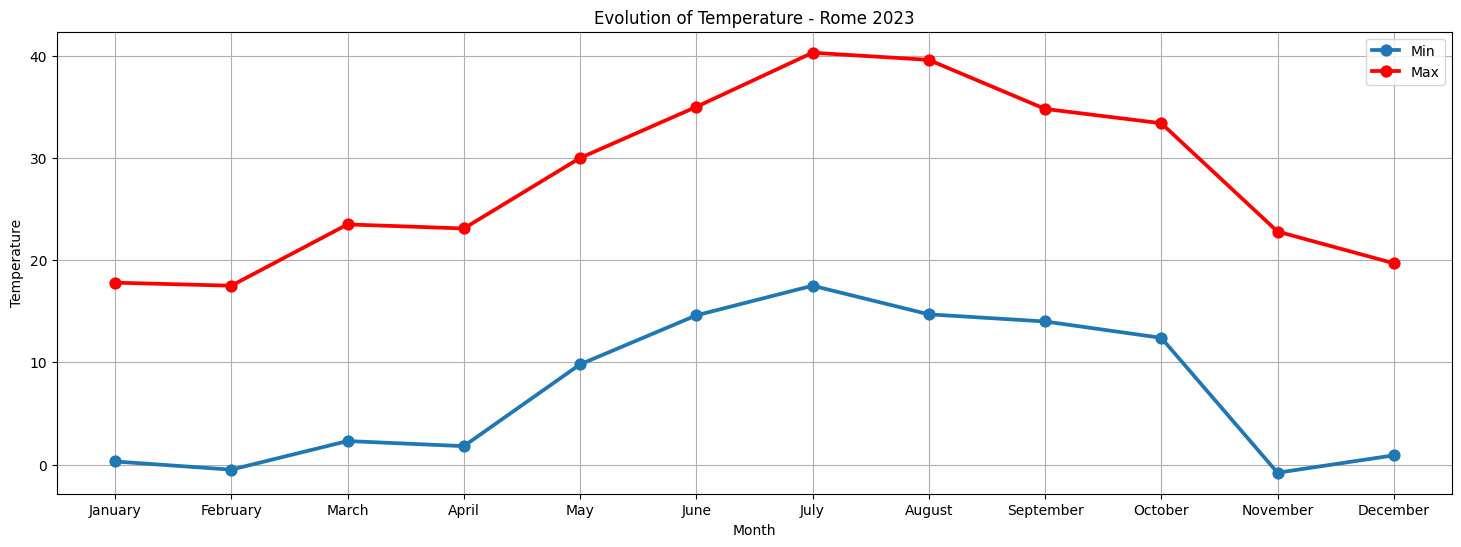

In [113]:
plt.figure(figsize=(18,6))
sns.pointplot(data=roma_2023, x="month name", y="min",label="Min")
sns.pointplot(data=roma_2023, x="month name", y="max",label="Max",color="r")
plt.xticks(rotation=0)
plt.ylabel("Temperature")
plt.xlabel("Month")
plt.title("Evolution of Temperature - Rome 2023")
plt.grid()
plt.show()

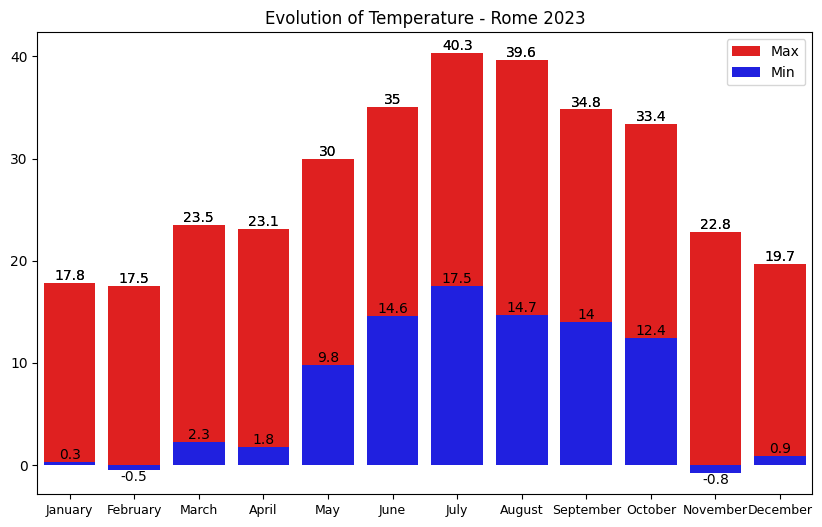

In [114]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x="month name",y="max",data=roma_2023,color="red",label="Max")
for bars in ax.containers:
    ax.bar_label(bars)
ax1=sns.barplot(x="month name",y="min",data=roma_2023,color="blue",label="Min")
for bars in ax1.containers:
    ax1.bar_label(bars)
plt.title("Evolution of Temperature - Rome 2023")
plt.xlabel("",fontsize=12)
plt.ylabel("",fontsize=12)
plt.xticks(rotation=0,size=9)
plt.show()

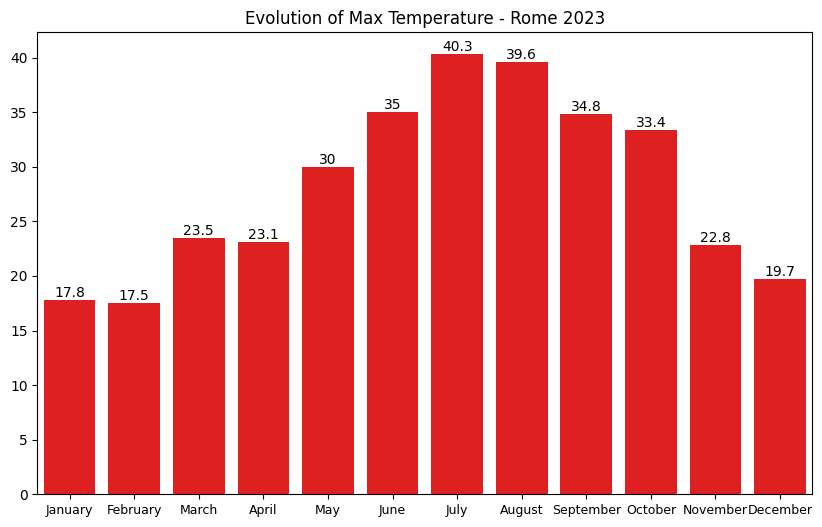

In [115]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x="month name",y="max",data=roma_2023,color="red")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Evolution of Max Temperature - Rome 2023")
plt.xlabel("",fontsize=12)
plt.ylabel("",fontsize=12)
plt.xticks(rotation=0,size=9)
plt.show()